First 5 Rows of the Dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana

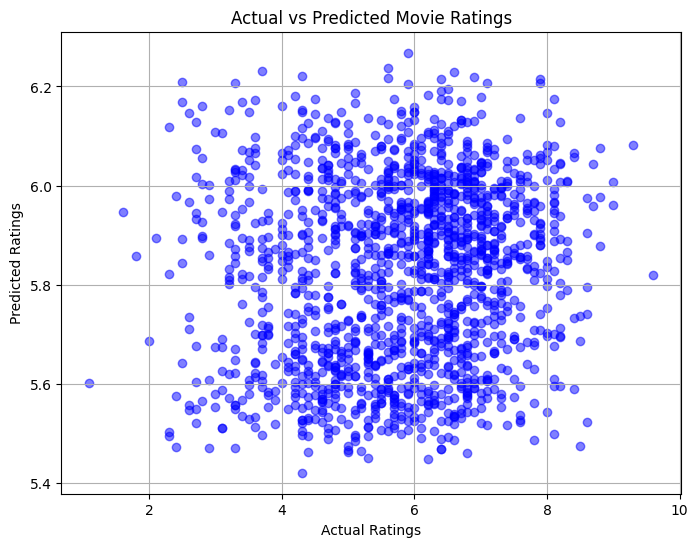

In [11]:
#Step 1: Import Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.preprocessing import LabelEncoder

#Step 2: Load Dataset

df = pd.read_csv("data/movies.csv",encoding='latin1') 
print("First 5 Rows of the Dataset:") 
print(df.head())

#Step 3: Select Useful Columns

selected_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Rating'] 
df = df[selected_columns] 
df.dropna(inplace=True)

#Step 4: Encode Categorical Variables

le = LabelEncoder() 
df['Genre'] = le.fit_transform(df['Genre']) 
df['Director'] = le.fit_transform(df['Director']) 
df['Actor 1'] = le.fit_transform(df['Actor 1']) 
df['Actor 2'] = le.fit_transform(df['Actor 2'])

#Step 5: Define Features and Target

X = df.drop('Rating', axis=1) 
y = df['Rating']

#Step 6: Split Data into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Step 7: Build and Train the Model

model = LinearRegression() 
model.fit(X_train, y_train)

#Step 8: Predict and Evaluate

y_pred = model.predict(X_test) 
print("\nEvaluation Metrics:") 
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

#Step 9: Plot Actual vs Predicted

plt.figure(figsize=(8, 6)) 
plt.scatter(y_test, y_pred, color='blue', alpha=0.5) 
plt.xlabel("Actual Ratings") 
plt.ylabel("Predicted Ratings") 
plt.title("Actual vs Predicted Movie Ratings") 
plt.grid(True) 
plt.show()